Cross validation is one way to evaluate a machine learning model. It involves splitting the dataset into multiple folds then validating on one after training the model on the rest of the folds. This establishes a reliable performance measure that assesses how the model will likely to generalize to an independent data set. Cross validation is widely used for estimating test error for the following reasons:

* Provides a less biased evaluation, which in turn, helps you reduce overfitting.
* Provides a reliable way to validate model when no explicit validation set is made available.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import os, sys
import numpy as np
import pandas as pd
import sklearn.model_selection
from sklearn.naive_bayes import GaussianNB

In [3]:
np.random.seed(18937)

In [4]:
datasource = "datasets/winequality-red.csv"

In [5]:
print(os.path.exists(datasource))

True


In [6]:
df = pd.read_csv(datasource).sample(frac = 1).reset_index(drop = True)
df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1059,11.2,0.67,0.55,2.3,0.084,6.0,13.0,1.00000,3.17,0.71,9.5,6
1,1561,7.0,0.51,0.09,2.1,0.062,4.0,9.0,0.99584,3.35,0.54,10.5,5
2,818,8.2,0.32,0.42,2.3,0.098,3.0,9.0,0.99506,3.27,0.55,12.3,6
3,19,7.0,0.36,0.21,2.4,0.086,24.0,69.0,0.99556,3.40,0.53,10.1,6
4,754,12.1,0.40,0.52,2.0,0.092,15.0,54.0,1.00000,3.03,0.66,10.2,5


In [7]:
del df["Unnamed: 0"]

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,11.2,0.67,0.55,2.3,0.084,6.0,13.0,1.00000,3.17,0.71,9.5,6
1,7.0,0.51,0.09,2.1,0.062,4.0,9.0,0.99584,3.35,0.54,10.5,5
2,8.2,0.32,0.42,2.3,0.098,3.0,9.0,0.99506,3.27,0.55,12.3,6
3,7.0,0.36,0.21,2.4,0.086,24.0,69.0,0.99556,3.40,0.53,10.1,6
4,12.1,0.40,0.52,2.0,0.092,15.0,54.0,1.00000,3.03,0.66,10.2,5


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Let's use a couple feature columns as input X and the quality column as the output y. Perform a 5-fold cross validation using cross_val_score(). It will split the data into 5 folds (based on the cv arg). It fits the data on 4 folds and scores the 5th fold. It gives you the 5 scores from which you can calculate a mean and variance for the score. This potentially allows you to cross validate in order to tune parameters and get an estimate of the score. The cross validation process involves fitting the model by definition so we don't need to fit the model prior to cross validation.

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

<i>sklearn.model_selection.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch=‘2*n_jobs’)</i>

<b>cv :</b> int, cross-validation generator or an iterable, optional

Determines the cross-validation splitting strategy. Possible inputs for cv are:
* None, to use the default 3-fold cross validation,
* integer, to specify the number of folds in a (Stratified)KFold,
* An object to be used as a cross-validation generator.
* An iterable yielding train, test splits.

For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.

In [10]:
m = GaussianNB()

In [11]:
X = np.array(df.iloc[:, :-1])[:, [1, 2, 6, 9, 10]]

In [12]:
y = np.array(df["quality"])

In [13]:
sklearn.model_selection.cross_val_score(m, X, y, cv = 5)

array([ 0.58074534,  0.59190031,  0.57320872,  0.55660377,  0.61198738])

The array above displays the 5 scores from the 5 fold cross validation. For each round of cross validation, the model was fit on 4 of the folds and scored on the one held out. Let's walk through this manually.

### Create folds

The original dataset should be randomly sampled into equal sized folders. We've already randomized the resample when we loaded the dataset. Next, we should split the data in 5 folds. 

In [14]:
help(np.array_split)

Help on function array_split in module numpy.lib.shape_base:

array_split(ary, indices_or_sections, axis=0)
    Split an array into multiple sub-arrays.
    
    Please refer to the ``split`` documentation.  The only difference
    between these functions is that ``array_split`` allows
    `indices_or_sections` to be an integer that does *not* equally
    divide the axis.
    
    See Also
    --------
    split : Split array into multiple sub-arrays of equal size.
    
    Examples
    --------
    >>> x = np.arange(8.0)
    >>> np.array_split(x, 3)
        [array([ 0.,  1.,  2.]), array([ 3.,  4.,  5.]), array([ 6.,  7.])]



In [15]:
X_folds = np.array_split(X, 5) # split the X array from earlier into 5 equal chunks 

In [17]:
[i.shape for i in X_folds]

[(320, 5), (320, 5), (320, 5), (320, 5), (319, 5)]

1600 observations with 5 features.

In [19]:
y_folds = np.array_split(y, 5)
[i.shape for i in y_folds]

[(320,), (320,), (320,), (320,), (319,)]

## Cross Validation

For each round i:

* concatenate all folds except fold #i to create the training set and fit the model
* then score the model based on the fold #i that was withheld from training

In [23]:
m = GaussianNB()

for i in range(5):
    X_train = np.concatenate([X_folds[j] for j in range(5) if j != i])
    X_test = X_folds[i]
    y_train = np.concatenate([y_folds[j] for j in range(5) if j != i])
    y_test = y_folds[i]
    
    print("CV", i)
    print("X_train", X_train.shape)
    print("X_test", X_test.shape)
    print("y_train", y_train.shape)
    print("y_test", y_test.shape)
    
    m.fit(X_train, y_train)
    print("Score", round(m.score(X_test, y_test), 3))
    print("=====================================")
    print("\n")

CV 0
X_train (1279, 5)
X_test (320, 5)
y_train (1279,)
y_test (320,)
Score 0.578


CV 1
X_train (1279, 5)
X_test (320, 5)
y_train (1279,)
y_test (320,)
Score 0.609


CV 2
X_train (1279, 5)
X_test (320, 5)
y_train (1279,)
y_test (320,)
Score 0.55


CV 3
X_train (1279, 5)
X_test (320, 5)
y_train (1279,)
y_test (320,)
Score 0.584


CV 4
X_train (1280, 5)
X_test (319, 5)
y_train (1280,)
y_test (319,)
Score 0.592




## Putting it all together

In [27]:
def cross_val_score(model, X, y, cv = 10):
    X_folds = np.array_split(X, cv)
    Y_folds = np.array_split(y, cv)
    
    for i in range(cv):
        X_train = np.concatenate([X_folds[j] for j in range(cv) if j != i])
        X_test = X_folds[i]
        y_train = np.concatenate([Y_folds[j] for j in range(cv) if j != i])
        y_test = y_folds[i]
        model.fit(X_train, y_train)
        yield model.score(X_test, y_test)

In [29]:
m = GaussianNB()

print("Our CV", list(cross_val_score(m, X, y, cv = 5)))
print("sklearn CV", sklearn.model_selection.cross_val_score(m, X, y, cv = 5))

Our CV [0.578125, 0.609375, 0.55000000000000004, 0.58437499999999998, 0.59247648902821315]
sklearn CV [ 0.58074534  0.59190031  0.57320872  0.55660377  0.61198738]


## 5 fold vs 10 fold cross validation

In [30]:
s5 = sklearn.model_selection.cross_val_score(m, X, y, cv = 5)
s10 = sklearn.model_selection.cross_val_score(m, X, y, cv = 10)

In [31]:
print("5 fold mean", np.mean(s5))
print("5 fold variance", np.var(s5))

5 fold mean 0.582889106234
5 fold variance 0.00034342714398


In [32]:
print("10 fold mean", np.mean(s10))
print("10 fold variance", np.var(s10))

10 fold mean 0.581071595506
10 fold variance 0.000413406225097


In [35]:
print("5 fold scores")
print(s5)

5 fold scores
[ 0.58074534  0.59190031  0.57320872  0.55660377  0.61198738]


In [36]:
print("10 fold scores")
print(s10)

10 fold scores
[ 0.56790123  0.59627329  0.57763975  0.56875     0.56875     0.6         0.5375
  0.5875      0.59493671  0.61146497]


Cross validated scores can have large variances especially on smaller datasets. We compared 5 and 10 fold cross validation and we can see that the 10 fold cross validation has shown higher variance

* Larger number of folds usually means less bias. However, as we use more folds, the testing dataset also gets smaller and the variance of cross validation score increases. 
* Too large of a number of folds means that only a low number of sample combinations is possible, thus limiting the number of iterations that are different. That is to say that the training data for each round will have a large overlap.

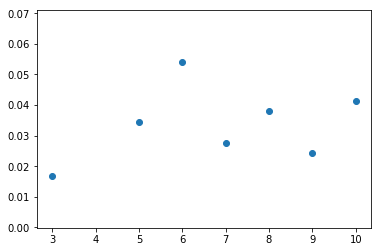

In [39]:
plt.scatter([3, 5, 6, 7, 8, 9, 10],
                [np.var(sklearn.model_selection.cross_val_score(m, X, y, cv = i)) * 100 for i in [3, 5, 6, 7, 8, 9, 10]])

The chart above shows how variance of scores changes with respect to the number of folds used. In order to lower the variance of the cross-validation result, you can iterate the cross validation with new random splits. If possible, use a number of folds that is a divisor of the sample size. The limitations of cross validation are mostly relevant to small datasets.